## Observations and Insights 

* ###### The box plot indicates that Capomulin and Ramicane are far more effective at lowering Tumor Volume than Infubinol and Ceftamin.

* ###### The data collected at the final timepoint for the four selected drugs, only had one outlier (in the Infubinol treatment group).

* ###### In regards to mouse weight versus tumor volume, the correlational coefficent 0.84 (r-squared of .71), provides evidence to suggest that larger mice are likely to have larger tumors.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_df['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_df[mouse_df.duplicated(['Timepoint', 'Mouse ID'])]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df[mouse_df['Mouse ID'] !='g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = mouse_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
rg_mean = regimen_df["Tumor Volume (mm3)"].mean()
rg_median = regimen_df["Tumor Volume (mm3)"].median()
rg_variance = regimen_df["Tumor Volume (mm3)"].var()
rg_stdev = regimen_df["Tumor Volume (mm3)"].std()
rg_sem = regimen_df["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
regimen_summary = pd.DataFrame({
    "Mean":rg_mean, 
    "Median":rg_median,
    "Variance":rg_variance,
    "Standard Deviation":rg_stdev, 
    "SEM":rg_sem
})
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_aggregate = regimen_df["Tumor Volume (mm3)"].aggregate(["mean", np.median, "var", "std", "sem"])
regimen_summary_aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Collection Timepoints by Regimen'}, xlabel='Drug Regimen', ylabel='Number of Collection Timepoints'>

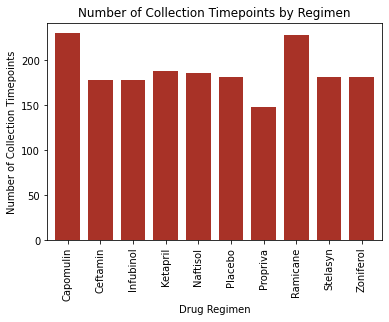

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_timepoints = regimen_df["Timepoint"].count()
regimen_timepoints.plot(kind='bar', title="Number of Collection Timepoints by Regimen", ylabel="Number of Collection Timepoints", width=0.75, color='#A83227')

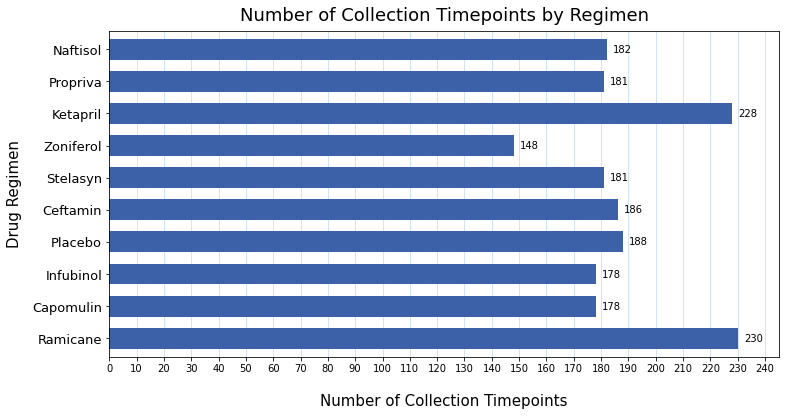

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pyplot.
category = mouse_df['Drug Regimen'].unique()
plt.figure(figsize=(12,6))
ax = regimen_timepoints.plot(kind="barh", width=.65, color='#3D61A8', zorder=2)
ax.set_title("Number of Collection Timepoints by Regimen", fontsize=18, pad=10)
ax.set_xlabel("Number of Collection Timepoints", fontsize=15, labelpad=20)
ax.set_ylabel("Drug Regimen", fontsize=15, labelpad=10)
ax.set_xlim(0,245)
ax.set_xticks(np.arange(0, len(regimen_timepoints)+240, 10))
ax.set_yticklabels(category, fontsize=13)
ax.grid(axis='x', zorder=1, color='#C9DDF5')
ax.bar_label(ax.containers[0], label_type='edge', padding=6)
    
plt.show()


<AxesSubplot:title={'center':'Total Mice by Sex'}, ylabel='Number of Mice'>

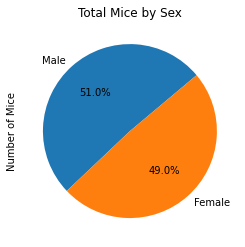

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Plot the figure.
sex = mouse_df['Sex'].value_counts()
sex.plot(kind='pie', title="Total Mice by Sex", ylabel="Number of Mice", xlabel="Sex", startangle=40, autopct='%1.1f%%')

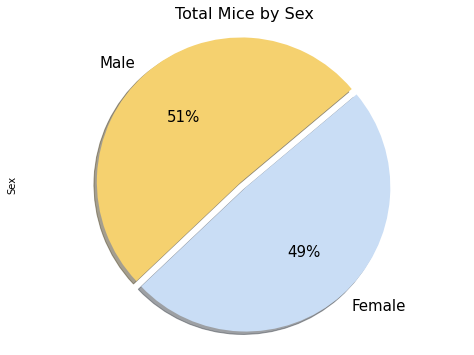

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
groups = mouse_df['Sex'].unique()
number = mouse_df['Sex'].count()
labels = ["Male", "Female"]
colors = ["#F5D16F", "#C9DDF5"]
explode = (0, 0.05)

plt.figure(figsize=(8,6))
ax = sex.plot(kind="pie", labels=labels, colors=colors, startangle=40, autopct='%1.0f%%', textprops={'color':"black", 'fontsize':15}, shadow=True, explode=explode)
ax.set_title("Total Mice by Sex", fontsize=16, pad=-20)
ax.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
mouse_df_endpoint = mouse_df.sort_values('Timepoint', ascending=False)
tumor_df = mouse_df_endpoint.drop_duplicates(subset = ['Mouse ID','Drug Regimen'], keep = 'first')
CRIC_end = tumor_df[tumor_df['Drug Regimen'].isin(treatments)]
CRIC_end

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
360,g316,Capomulin,Female,22,22,45,40.159220,2
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
350,v923,Capomulin,Female,19,21,45,40.658124,2
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# COMPLETED ABOVE

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = {'Capomulin':[], 'Ramicane':[], 'Infubinol':[], 'Ceftamin':[]}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_df=CRIC_end[CRIC_end['Drug Regimen'] == 'Capomulin']
ramicane_df=CRIC_end[CRIC_end['Drug Regimen'] == 'Ramicane']
infubinol_df=CRIC_end[CRIC_end['Drug Regimen'] == 'Infubinol']
ceftamin_df=CRIC_end[CRIC_end['Drug Regimen'] == 'Ceftamin']

def iqr_calculator(df, drug):
    q1 = np.percentile(df['Tumor Volume (mm3)'], [25], interpolation='midpoint')
    q3 = np.percentile(df['Tumor Volume (mm3)'], [75], interpolation='midpoint')
    iqr = q3 - q1
    tumor_data[drug].append(q1)
    tumor_data[drug].append(q3)
    tumor_data[drug].append(iqr)
    print(drug)
    print(f'Q1: {q1}')
    print(f'Q3: {q3}')
    print(f'IQR: {iqr}')
    for i in df['Tumor Volume (mm3)']:
        if i < (q1 - iqr*1.5) or i >(q3 + iqr*1.5):
            print(f"** Outlier: {i}")
    print("-"*50)

In [16]:
iqr_calculator(capomulin_df, "Capomulin")
iqr_calculator(ramicane_df, "Ramicane")
iqr_calculator(infubinol_df, "Infubinol")
iqr_calculator(ceftamin_df, "Ceftamin")
tumor_data

Capomulin
Q1: [32.37735684]
Q3: [40.1592203]
IQR: [7.78186346]
--------------------------------------------------
Ramicane
Q1: [31.56046955]
Q3: [40.65900627]
IQR: [9.09853672]
--------------------------------------------------
Infubinol
Q1: [54.04860769]
Q3: [65.52574285]
IQR: [11.47713516]
** Outlier: 36.3213458
--------------------------------------------------
Ceftamin
Q1: [48.72207785]
Q3: [64.29983003]
IQR: [15.57775218]
--------------------------------------------------


{'Capomulin': [array([32.37735684]), array([40.1592203]), array([7.78186346])],
 'Ramicane': [array([31.56046955]), array([40.65900627]), array([9.09853672])],
 'Infubinol': [array([54.04860769]),
  array([65.52574285]),
  array([11.47713516])],
 'Ceftamin': [array([48.72207785]),
  array([64.29983003]),
  array([15.57775218])]}

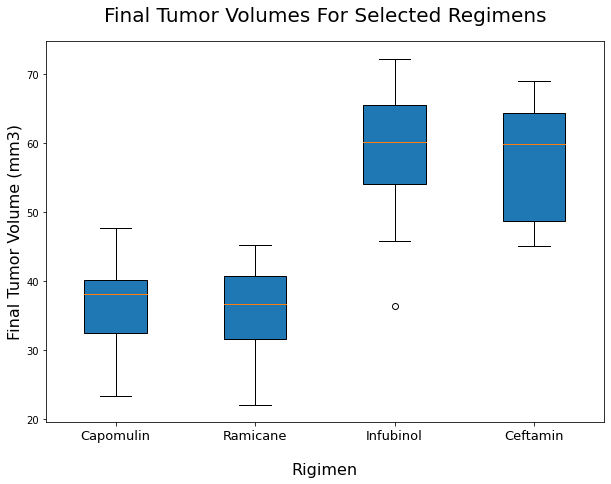

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin_tumor=capomulin_df['Tumor Volume (mm3)']
ramicane_tumor=ramicane_df['Tumor Volume (mm3)']
infubinol_tumor=infubinol_df['Tumor Volume (mm3)']
ceftamin_tumor=ceftamin_df['Tumor Volume (mm3)']
all_tumors=[capomulin_tumor,ramicane_tumor,infubinol_tumor,ceftamin_tumor]

fig, ax=plt.subplots(1, figsize=(10, 7))
boxplot=ax.boxplot(all_tumors, patch_artist=True)
ax.set_title('Final Tumor Volumes For Selected Regimens', fontsize=20, pad=20)
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize=16)
ax.set_xlabel('Rigimen', fontsize=16, labelpad=20)
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], fontsize=13)

plt.show()

## Line and Scatter Plots

<AxesSubplot:title={'center':'Capomulin: Tumor Volume Over Time'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

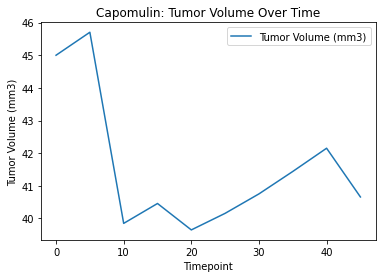

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = mouse_df[mouse_df["Mouse ID"]== "v923"]
cap_mouse.plot(kind='line', x='Timepoint', y="Tumor Volume (mm3)", title="Capomulin: Tumor Volume Over Time", ylabel="Tumor Volume (mm3)")

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

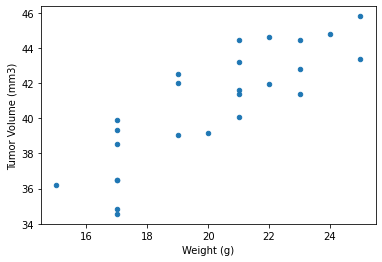

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_scatter = mouse_df[mouse_df["Drug Regimen"]== "Capomulin"].groupby("Mouse ID").mean()
cap_scatter.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

## Correlation and Regression

Correlation: 0.84
R-Squared: 0.71


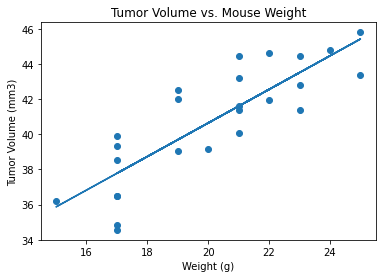

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = cap_scatter['Weight (g)']
tumor_volume = cap_scatter['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor_volume)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_volume)
regression_line = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor_volume)
plt.plot(weight,regression_line)
plt.annotate(line_eq,(20,25))
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Mouse Weight")
print(f"Correlation: {round(correlation[0],2)}")
print(f"R-Squared: {round(rvalue**2,2)}")
plt.show()